#### DATA PREPROCESSING (LOADING TEXT & CHUNKING)

In [56]:
import os

In [57]:
from dotenv import load_dotenv
load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [ ]:
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import DirectoryLoader


## Normalize and Remove Accents from text

In [ ]:
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [ ]:
with open("hackatext.txt", encoding='utf-8') as f:
    data = f.read()
     
print(data)

In [ ]:
data = remove_accents(data)

In [ ]:
print(data)

In [ ]:
data = data.lower()

In [ ]:
print(data)

In [ ]:
f = open('norm_hackatext.txt', 'w', encoding= "utf-8")
f.write(data)

In [ ]:
token_data =data.split()
print(token_data)

In [ ]:
f = open('norm_hackatext.txt', 'r', encoding = utf - 8)


In [ ]:
with open("norm_hackatext.txt", encoding='utf-8') as f:
    data = f.read()

## Load Data via TextLoader


In [9]:
loader = TextLoader(file_path=r"C:\Users\Kouts\OneDrive - University of Nicosia\Desktop\Langchain Test\norm_hackatext.txt", encoding='utf-8')

In [10]:
data = loader.load()

In [13]:
print (f'You have {len(data)} document(s) in your data')
print (f'There are {len(data[0].page_content)} characters in your sample document')
print (f'Here is a sample: {data[0].page_content[:200]}')

You have 1 document(s) in your data
There are 375748 characters in your sample document
Here is a sample: μελιτη μανουκα
εμπραγματο δικαιο
(α) κτηση του εμπραγματου δικαιωματος
παραγωγη και πρωτοτυπη κτηση
(α) παραγωγη κτηση ειναι αυτη που στηριζεται σε προυπαρχον δικαιωμα αλλου
προσωπου. δηλαδη το δικαιω


In [34]:

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
texts = text_splitter.split_documents(data)

In [35]:
print (f'Now you have {len(texts)} documents')

Now you have 999 documents


## Compute token count using OpenAI tokenizer

In [36]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

def tiktoken_len(text):
    tokens = tokenizer.encode(text, disallowed_special=())
    return len(tokens)

In [45]:
tiktoken_len(data[0].page_content)

318353

In [37]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [38]:
token_counts = [tiktoken_len(doc.page_content) for doc in texts]


In [39]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 1
Avg: 319
Max: 441


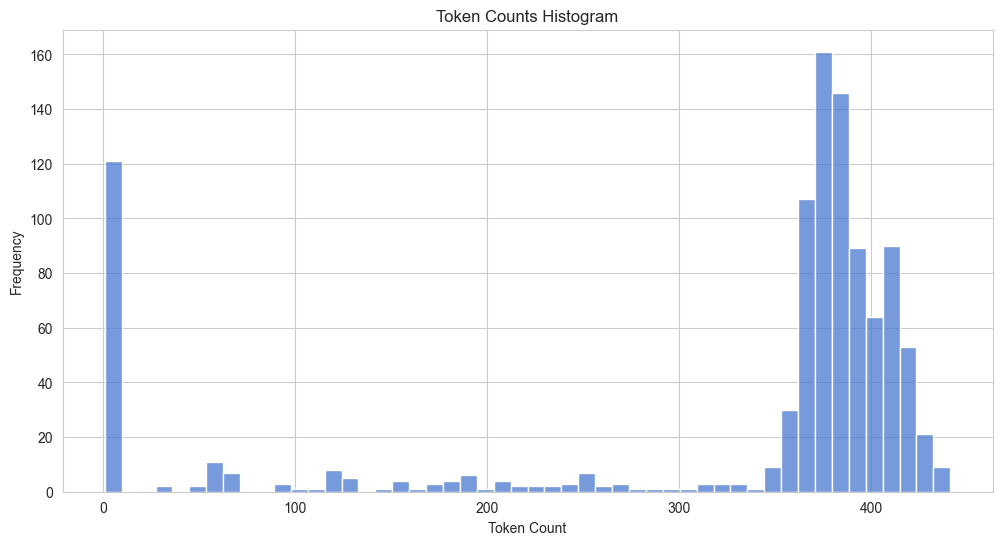

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [47]:
from langchain.vectorstores import chroma
from langchain.embeddings.openai import OpenAIEmbeddings

## Embed text using OpenAI Embeddings


In [53]:


embedding = OpenAIEmbeddings()


RuntimeError: [91mYour system has an unsupported version of sqlite3. Chroma                     requires sqlite3 >= 3.35.0.[0m
[94mPlease visit                     https://docs.trychroma.com/troubleshooting#sqlite to learn how                     to upgrade.[0m

In [ ]:
embedding = OpenAIEmbeddings()


In [63]:
from langchain.vectorstores import pinecone

index_name = "test"

docsearch = Pinecone.from_documents(texts, embedding, index_name=index_name)

AttributeError: type object 'Pinecone' has no attribute 'from_documents'

In [62]:
from pinecone import Pinecone

pc = Pinecone(api_key='1dbddeed-8f5e-403a-9a1b-c964ac2aad5d')

In [60]:
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY', 'YourAPIKey')
PINECONE_API_ENV = os.getenv('PINECONE_API_ENV', 'us-east1-gcp') # You may need to switch with your env

initialize pinecone
pinecone.init(
    api_key=PINECONE_API_KEY,  # find at app.pinecone.io
    environment=PINECONE_API_ENV  # next to api key in console
 )
 index_name = "test" # put in the name of your pinecone index here

 docsearch = Pinecone.from_texts([t.page_content for t in texts], embedding, index_name=index_name)

SyntaxError: invalid syntax (1949022362.py, line 4)